In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


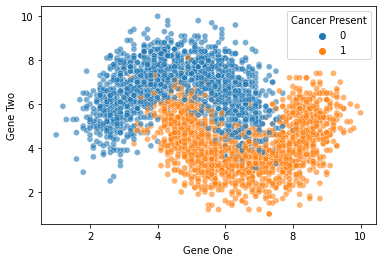

In [4]:
#Visualizar os dados

sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present',
               alpha = 0.6);

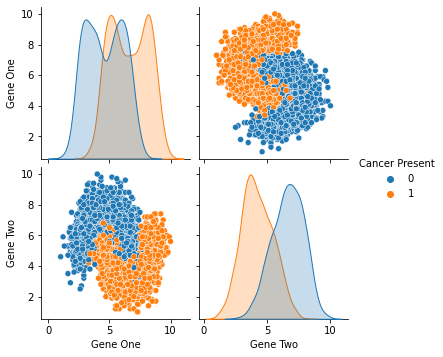

In [5]:
#Pairplot

sns.pairplot(data = df, hue = 'Cancer Present');

In [6]:
#É necessário treinar o modelo como se tem feito para a regressão linear e logistica
#Assim como atriuir dimensionar os valores

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier

In [12]:
#o parametro mais importante aqui é o valor de K, o resto pode ser deixado com os parametros padrao

knn_model = KNeighborsClassifier(n_neighbors=1)

In [13]:
#definir o modelo com os valores de treino

knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
#prever os valores

y_pred = knn_model.predict(scaled_X_test)

In [15]:
#os parametros de avaliação são os mesmos do que na regressão linear

from sklearn.metrics import confusion_matrix, classification_report

In [16]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



Multiple Neighbours - K > 1

In [18]:
#uma maneira de determinar qual o melhor valor de K
#pode-se ir pela accuracy e com este valor, determinar o erro (1-accuracy)

from sklearn.metrics import accuracy_score

In [19]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    
    error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(error)
    
    print('K: {}, Erro: {}'.format(k,error))

K: 1, Erro: 0.10777777777777775
K: 2, Erro: 0.09999999999999998
K: 3, Erro: 0.07444444444444442
K: 4, Erro: 0.07666666666666666
K: 5, Erro: 0.07222222222222219
K: 6, Erro: 0.06444444444444442
K: 7, Erro: 0.06444444444444442
K: 8, Erro: 0.06222222222222218
K: 9, Erro: 0.06000000000000005
K: 10, Erro: 0.06222222222222218
K: 11, Erro: 0.06222222222222218
K: 12, Erro: 0.06000000000000005
K: 13, Erro: 0.06222222222222218
K: 14, Erro: 0.06222222222222218
K: 15, Erro: 0.06000000000000005
K: 16, Erro: 0.05666666666666664
K: 17, Erro: 0.05555555555555558
K: 18, Erro: 0.05555555555555558
K: 19, Erro: 0.053333333333333344
K: 20, Erro: 0.053333333333333344
K: 21, Erro: 0.054444444444444406
K: 22, Erro: 0.05111111111111111
K: 23, Erro: 0.054444444444444406
K: 24, Erro: 0.054444444444444406
K: 25, Erro: 0.05666666666666664
K: 26, Erro: 0.05666666666666664
K: 27, Erro: 0.05555555555555558
K: 28, Erro: 0.05777777777777782
K: 29, Erro: 0.05777777777777782


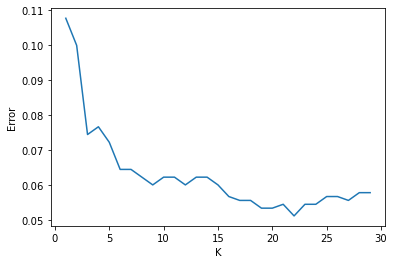

In [20]:
#Visualização da evolução do erro

#Pode ser tentador escolher o min(K) mas deve-se considerar tb se vale a pena aumentar tanto 
#a complexidade do modelo

plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error')
plt.xlabel('K');

PIPELINE

In [21]:
#Este método - Pipeline - permite fazer os passos desde o scaling até fazer uma grid search 

#Primeiro é preciso definir as operações

scaler = StandardScaler()
knn = KNeighborsClassifier()

In [22]:
#os strings tem de ser muito bem definidos

operations = [('scaler', scaler), ('knn', knn)]

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
#damos o objecto operations à classe que criamos

pipe = Pipeline(steps = operations)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
k_values = list(range(1,20))

In [27]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [28]:
#aqui é preciso cautela para se definir bem os parametros para a Pipeline da seguinte forma
#nome do string (ex: knn) + 2 vezes underscore + nome real do parametro no modelo

param_grid = {'knn__n_neighbors': k_values}

In [29]:
#fazendo a Grid Search

full_cv_classifier = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [30]:
#não é necessário fazer scaling aos dados
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [31]:
#Daqui determinamos os melhores parametros - PARA TODA A PIPELINE!!

full_cv_classifier.best_estimator_.get_params() #K = 14

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [32]:
#É possivel recalcular tudo com os parametros encontrados pela grid search, mas é preferivel
#utilizar o método em baixo

full_cv_classifier.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [35]:
#Classification report

full_pred = full_cv_classifier.predict(X_test) 

In [37]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [38]:
#Novo paciente aleatóreo das aulas

new_patient = [[3.8, 6.4]]

In [39]:
#Não tem doença cardiaca

full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [40]:
#Probabilidade = 1 de não ter doença cardiaca

full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])